# Sampling Chadwyck-Healey poetry collections

In [1]:
import sys
sys.path.append('../')
from generative_formalism import *

## By period

### As in paper

In [2]:
documentation(get_chadwyck_corpus_sampled_by_period_as_in_paper, source=True)

**`get_chadwyck_corpus_sampled_by_period_as_in_paper`**

```md
Load the period-based sample used in the paper (precomputed).
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_as_in_paper() -> pd.DataFrame:
    """Load the period-based sample used in the paper (precomputed)."""
    return pd.read_csv(PATH_SAMPLE_PERIOD_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')

```

In [3]:
df_smpl_by_period_in_paper = get_chadwyck_corpus_sampled_by_period_as_in_paper()
df_smpl_by_period_in_paper.head()

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2438/Z300661875,1,,English Poetry,"Price, Herbert, b. 1858",1858.0,THE FORSAKEN GARDEN,1888,35,Poems and Sonnets by Herbert Price (1914),"In the garden we loved that is now a waste,",y,,1850-1900,"Ah! sweet were the days, and the nights and th..."
english/pennecu1/Z200459978,1,1660-1700 Restoration,English Poetry,"Pennecuik, Alexander, 1652-1722",1652.0,THE CITY AND COUNTRY MOUSE.,1682,50,The Works (1815),"&indent;Met with a city mouse, right smooth an...",y,,1650-1700,"A country mouse, upon a winter's day,\n Met..."
english/wattsisa/Z300523040,2,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,SONG 11. Heaven and Hell.,1704,16,The Works (1810),&indent;A heav'n of joy and love;,y,Lyric,1650-1700,There is beyond the sky\n A heaven of joy a...
english/hardytho/Z200137433,3,1870-1899 Later Nineteenth-Century,English Poetry,"Hardy, Thomas, 1840-1928",1840.0,WHEN DEAD,1870,16,,&indent;&indent;I am under the bough;,y,,1800-1850,It will be much better when\n I am unde...
c20-american/da22040/Z300203417,3,1900-1999 Twentieth-Century,American Poetry,"Walker, Margaret, 1915-1998",1915.0,BALLAD OF THE HOPPY&hyphen;TOAD,1945,84,,Ain't been on Market Street for nothing,,,1900-1950,Ain't been on Market Street for nothing\nWith ...


In [4]:
assert len(df_smpl_by_period_in_paper) == 8000

##### Gegenerating new sample

In [5]:
documentation(get_chadwyck_corpus_sampled_by_period_as_replicated, source=True)
documentation(gen_chadwyck_corpus_sampled_by_period, source=True)
documentation(sample_chadwyck_corpus)

**`get_chadwyck_corpus_sampled_by_period_as_replicated`**

```md
Convenience wrapper to compute or load period-stratified sample (replication).
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_as_replicated(overwrite=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load period-stratified sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_period(force=overwrite)
    return df_smpl

```

**`gen_chadwyck_corpus_sampled_by_period`**

```md
Generate a period-stratified sample from the full corpus.
```
----


*Source code*

```py
def gen_chadwyck_corpus_sampled_by_period() -> pd.DataFrame:
    """Generate a period-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by='period',
    )
    return df

```

**`sample_chadwyck_corpus`**

```md
Deterministically sample `df_corpus` by one or more grouping keys.

    Rules
    - Keep only groups with at least `min_sample_n` items (if provided).
    - Within each group, sort by `id_hash` and take the first `max_sample_n` rows
      (if provided). This ensures stable sampling across runs.

    Parameters
    - df_corpus: Corpus DataFrame (e.g., from `get_chadwyck_corpus`).
    - sample_by: Column name or list of names to group by.
    - min_sample_n, max_sample_n: Group size constraints.

    Returns
    - pd.DataFrame containing the sampled rows.
    
```
----


In [6]:
df_smpl_by_period = get_chadwyck_corpus_sampled_by_period_as_replicated()
df_smpl_by_period.head()


* Loading period sample from /Users/rj416/github/generative-formalism/data/corpus_sample_by_period.replicated.csv.gz


,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2552/Z300670720,12,NaN,English Poetry,"Daley, Victor J. (Victor James), 1858-1905.",1858.0,The Pharisee,1888,32,Creeve Roe: Poetry by Victor Daley: Edited by ...,"He did not stand with open palm,",y,NaN,1850-1900,"He did not stand with open palm,\n Hand-fee..."
c20-english/car2302/Z200592139,14,1900-1999 Twentieth-Century,English Poetry,"Khalvati, Mimi, 1944-",1944.0,A Persian Miniature,1974,45,NaN,"She told us: take a picture, an art postcard",NaN,NaN,1900-1950,"She told us: take a picture, and art postcard\..."
english/keblejoh/Z200408216,22,1835-1869 Mid Nineteenth-Century,English Poetry,"Keble, John, 1792-1866",1792.0,Holy Communion.,1822,68,The Christian Year (1866),"How should pale sinners bear the sight,",y,NaN,1750-1800,"O God of Mercy, God of Might,\nHow should pale..."
english/devereau/Z400337559,30,1870-1899 Later Nineteenth-Century,English Poetry,"De Vere, Aubrey, 1814-1902",1814.0,XXI. SINE LABE ORIGINALI CONCEPTA.,1844,16,The Poetical Works (1884),"&indent;On Heaven, not him, are fixed her eyes:",y,NaN,1800-1850,Her foot is on the Lord of Night:\n On Heav...
c20-american/am22124/Z500297385,39,1900-1999 Twentieth-Century,American Poetry,"Cummings, E. E. (Edward Estlin), 1894-1962.",1894.0,V [Babylon slim],1924,19,NaN,Babylon slim,NaN,NaN,1850-1900,Babylon slim\n-ness of\nevenslicing\neyes are ...


In [7]:
if len(df_smpl_by_period):
    assert len(df_smpl_by_period) == 8000

### By rhyme

#### As in paper

In [8]:
documentation(get_chadwyck_corpus_sampled_by_rhyme_as_in_paper, source=True)

**`get_chadwyck_corpus_sampled_by_rhyme_as_in_paper`**

```md
Load the rhyme-based sample used in the paper (precomputed).
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_rhyme_as_in_paper() -> pd.DataFrame:
    """Load the rhyme-based sample used in the paper (precomputed)."""
    return pd.read_csv(PATH_SAMPLE_RHYMES_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')

```

In [9]:
df_smpl_by_rhyme_in_paper = get_chadwyck_corpus_sampled_by_rhyme_as_in_paper()
assert len(df_smpl_by_rhyme_in_paper) == 2000
df_smpl_by_rhyme_in_paper.head()

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2438/Z300661875,1,,English Poetry,"Price, Herbert, b. 1858",1858.0,THE FORSAKEN GARDEN,1888,35,Poems and Sonnets by Herbert Price (1914),"In the garden we loved that is now a waste,",y,,1850-1900,"Ah! sweet were the days, and the nights and th..."
english/pennecu1/Z200459978,1,1660-1700 Restoration,English Poetry,"Pennecuik, Alexander, 1652-1722",1652.0,THE CITY AND COUNTRY MOUSE.,1682,50,The Works (1815),"&indent;Met with a city mouse, right smooth an...",y,,1650-1700,"A country mouse, upon a winter's day,\n Met..."
english/wattsisa/Z300523040,2,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,SONG 11. Heaven and Hell.,1704,16,The Works (1810),&indent;A heav'n of joy and love;,y,Lyric,1650-1700,There is beyond the sky\n A heaven of joy a...
english/hardytho/Z200137433,3,1870-1899 Later Nineteenth-Century,English Poetry,"Hardy, Thomas, 1840-1928",1840.0,WHEN DEAD,1870,16,,&indent;&indent;I am under the bough;,y,,1800-1850,It will be much better when\n I am unde...
english/fawkesfr/Z300372956,4,1750-1799 Later Eighteenth-Century,English Poetry,"Fawkes, Francis, 1720-1777",1720.0,"III. ON A WORTHY FRIEND, Who was accomplished...",1750,10,Original Poems and Translations (1761),"Thou friendly, candid, virtuous mind, farewel!",y,,1700-1750,"Oh born in liberal studies to excel,\nThou fri..."


#### Replicated

In [10]:
documentation(get_chadwyck_corpus_sampled_by_rhyme_as_replicated, source=True)
documentation(gen_chadwyck_corpus_sampled_by_rhyme, source=True)

**`get_chadwyck_corpus_sampled_by_rhyme_as_replicated`**

```md
Convenience wrapper to compute or load rhyme-stratified sample (replication).
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_rhyme_as_replicated(overwrite=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load rhyme-stratified sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_rhyme(force=overwrite)
    return df_smpl

```

**`gen_chadwyck_corpus_sampled_by_rhyme`**

```md
Generate a rhyme-stratified sample from the full corpus.
```
----


*Source code*

```py
def gen_chadwyck_corpus_sampled_by_rhyme() -> pd.DataFrame:
    """Generate a rhyme-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df_corpus = df_corpus[df_corpus.rhyme.isin({'y','n'})]
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by='rhyme',
    )
    return df

```

In [11]:
df_smpl_by_rhyme = get_chadwyck_corpus_sampled_by_rhyme_as_replicated()
df_smpl_by_rhyme.head()

* Loading rhyme sample from /Users/rj416/github/generative-formalism/data/corpus_sample_by_rhyme.replicated.csv.gz


,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2552/Z300670720,12,NaN,English Poetry,"Daley, Victor J. (Victor James), 1858-1905.",1858.0,The Pharisee,1888,32,Creeve Roe: Poetry by Victor Daley: Edited by ...,"He did not stand with open palm,",y,NaN,1850-1900,"He did not stand with open palm,\n Hand-fee..."
english/keblejoh/Z200408216,22,1835-1869 Mid Nineteenth-Century,English Poetry,"Keble, John, 1792-1866",1792.0,Holy Communion.,1822,68,The Christian Year (1866),"How should pale sinners bear the sight,",y,NaN,1750-1800,"O God of Mercy, God of Might,\nHow should pale..."
english/devereau/Z400337559,30,1870-1899 Later Nineteenth-Century,English Poetry,"De Vere, Aubrey, 1814-1902",1814.0,XXI. SINE LABE ORIGINALI CONCEPTA.,1844,16,The Poetical Works (1884),"&indent;On Heaven, not him, are fixed her eyes:",y,NaN,1800-1850,Her foot is on the Lord of Night:\n On Heav...
american/am0240/Z300152753,39,1835-1869 Mid Nineteenth-Century,American Poetry,"Cary, Alice, 1820-1871",1820.0,TO A STAGNANT RIVER.,1850,24,The Poetical Works Of Alice and Phœbe Cary (1882),To the hill? Can you move him away from his pl...,y,NaN,1800-1850,"O river, why lie with your beautiful face\nTo ..."
english/montagul/Z200443148,47,1700-1749 Early Eighteenth-Century,English Poetry,"Montagu, Mary Wortley, Lady, 1689-1762",1689.0,"EPILOGUE TO MARY, Queen of SCOTS.",1719,41,The Poetical Works (1768),"To fix her joys, or to extend her pow'r?",y,NaN,1650-1700,"What could luxurious woman wish for more,\nTo ..."


In [12]:
assert len(df_smpl_by_rhyme) == 2000

## By period/subcorpus

#### As in paper

In [13]:
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper, source=True)
documentation(display_period_subcorpus_tables, source=True)
documentation(get_period_subcorpus_table)


**`get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper`**

```md
Load the period×subcorpus sample used in the paper and optionally display a table.
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper(display=False) -> pd.DataFrame:
    """Load the period×subcorpus sample used in the paper and optionally display a table."""
    odf = pd.read_csv(PATH_SAMPLE_PERIOD_SUBCORPUS_IN_PAPER).fillna('').set_index('id').sort_values('id_hash')
    if display:
        display_period_subcorpus_tables(odf)
    return odf

```

**`display_period_subcorpus_tables`**

```md
Display summary tables for a sampled DataFrame (IPython rich display if available).
```
----


*Source code*

```py
def display_period_subcorpus_tables(df):
    """Display summary tables for a sampled DataFrame (IPython rich display if available)."""
    try_display(get_period_subcorpus_table(df, return_display=True))

```

**`get_period_subcorpus_table`**

```md
Build a period×subcorpus summary table and optionally save LaTeX.

    Parameters
    - df_smpl: Sampled DataFrame containing `period`, `subcorpus`, `author`, `id`.
    - save_latex_to: Base path for LaTeX/table image output; if falsy, skip saving.
    - save_latex_to_suffix: Filename suffix for differentiation.
    - return_display: If True, return a display object suitable for notebooks.
    - table_num: Optional table number for LaTeX captioning.

    Returns
    - A formatted DataFrame (if not returning display object) or a display/image object.
    
```
----


* Loading metadata from /Users/rj416/github/generative-formalism/data/chadwyck_poetry/metadata.csv
* Loaded 336180 rows of metadata
* Filtering: 259,310 rows after author birth year >= 1600
* Filtering: 259,310 rows after author birth year <= 2000
* Filtering: 225,986 rows after number of lines >= 10
* Filtering: 204,514 rows after number of lines <= 100


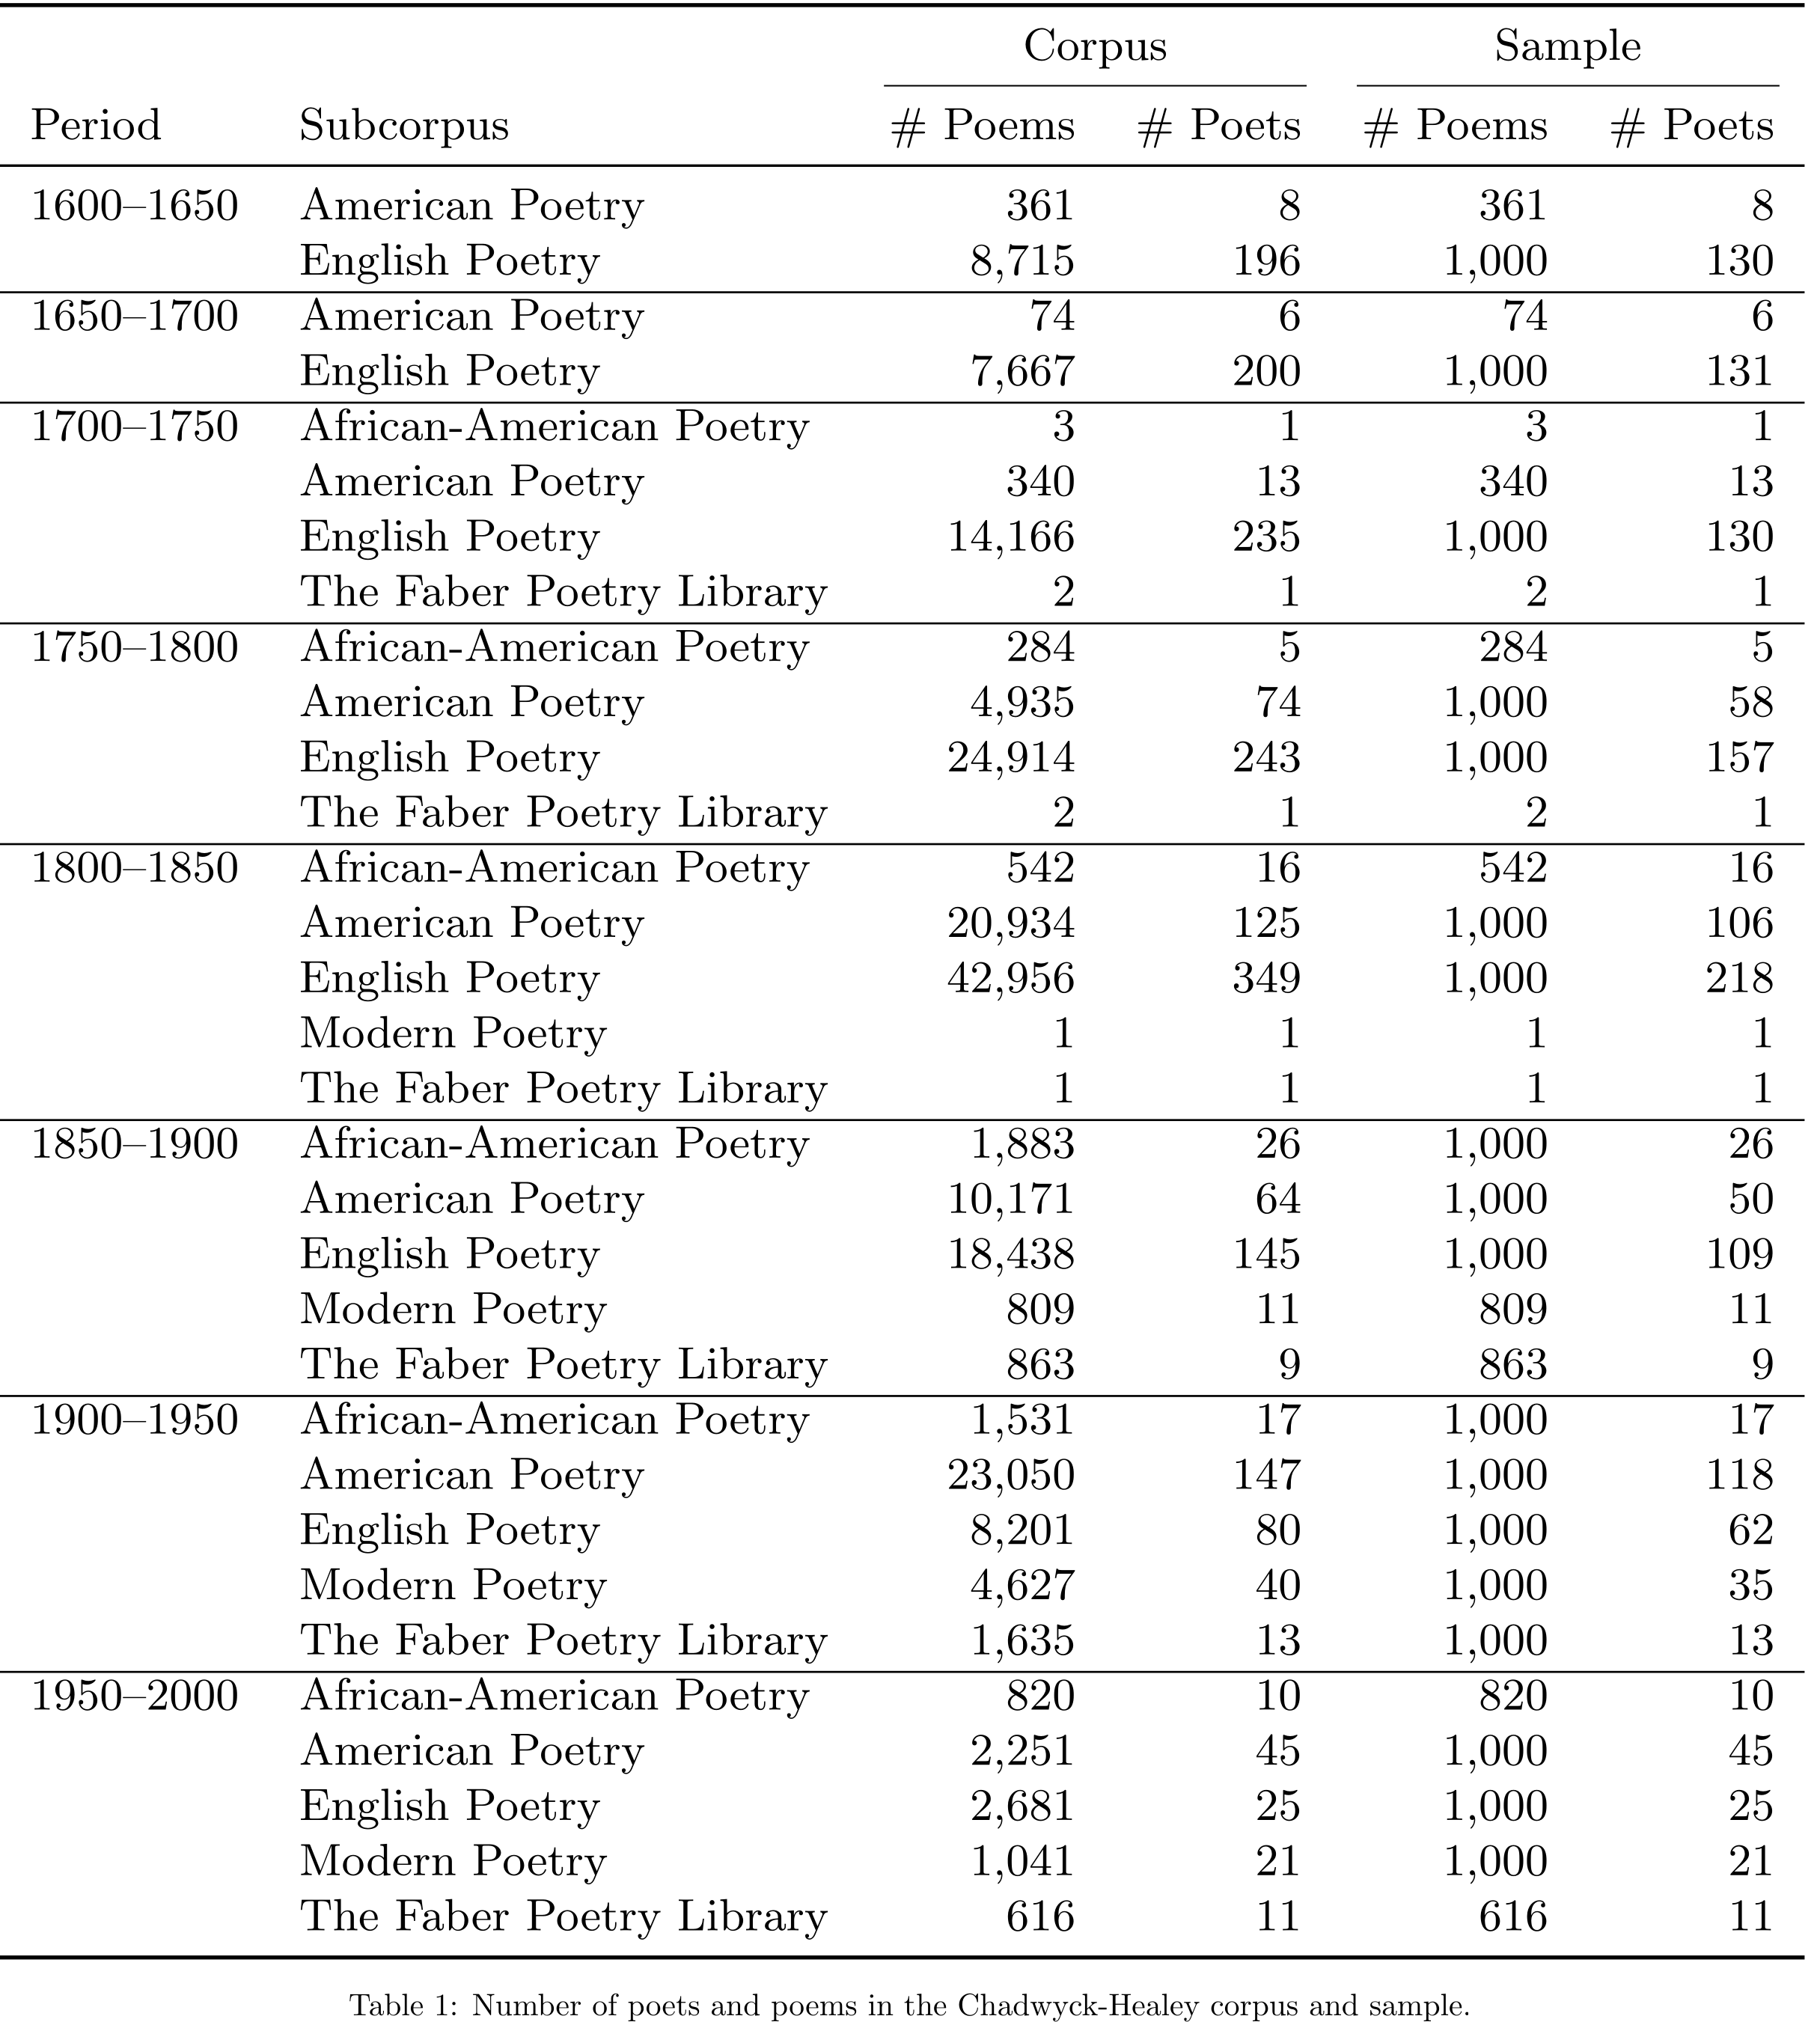

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
c20-english/ep20152/Z200586158,2,1900-1999 Twentieth-Century,English Poetry,"Rosenberg, Isaac, 1890-1918",1890.0,‘I KNOW YOU GOLDEN’,1920,12,,I know you golden,,,1850-1900,I know you golden\nAs summer and pale\nAs the ...
english/kerpeter/Z300410015,3,1660-1700 Restoration,English Poetry,"Ker, Patrick, fl. 1691",1691.0,On the Memory of a Married Maid.,1721,16,Flosculum Poeticum (1684),A Marrie'd&hyphen;Virgin to remain.,y,,1650-1700,"Within this Coffin here does lie,\nA Pattern o..."
american/am1258/Z200196105,7,1835-1869 Mid Nineteenth-Century,American Poetry,"Emerson, Ralph Waldo, 1803-1882",1803.0,SEPTEMBER,1833,16,Poems [1904],"&indent;Of a gusty Autumn day,",y,,1800-1850,In the turbulent beauty\n Of a gusty Autumn...
english/gilfilla/Z400379001,8,1800-1834 Early Nineteenth-Century,English Poetry,"Gilfillan, Robert, 1798-1850",1798.0,NORWEGIAN SMUGGLER'S SONG.,1828,36,Poems and Songs (1851),"&indent;The storm is loud and high,",y,,1750-1800,"Awake, you midnight mariners!\n The storm i..."
english/wattwill/Z300523577,18,1800-1834 Early Nineteenth-Century,English Poetry,"Watt, William, 1793-1859",1793.0,BAB AT THE BOWSTER.,1823,40,Poems and Songs (1860),Wi' touslet hair and drowsy een?,y,Ballad,1750-1800,"Lassie, whare were you yestreen,\nWi' touslet ..."


In [14]:
df_smpl_by_period_subcorpus_in_paper = get_chadwyck_corpus_sampled_by_period_subcorpus_as_in_paper(display=True)
df_smpl_by_period_subcorpus_in_paper.head()

#### Replicated

In [15]:
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated, source=True)
documentation(get_chadwyck_corpus_sampled_by_period_subcorpus, source=True)
documentation(gen_chadwyck_corpus_sampled_by_period_subcorpus, source=True)

**`get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated`**

```md
Convenience wrapper to compute or load period×subcorpus sample (replication).
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated(overwrite=False, display=False) -> pd.DataFrame:
    """Convenience wrapper to compute or load period×subcorpus sample (replication)."""
    df_smpl = get_chadwyck_corpus_sampled_by_period_subcorpus(force=overwrite)
    if display:
        display_period_subcorpus_tables(df_smpl)
    return df_smpl

```

**`get_chadwyck_corpus_sampled_by_period_subcorpus`**

```md
Load or generate period×subcorpus sample; cache on disk at `PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED`.
```
----


*Source code*

```py
def get_chadwyck_corpus_sampled_by_period_subcorpus(force=False, display=False) -> pd.DataFrame:
    """Load or generate period×subcorpus sample; cache on disk at `PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED`."""
    path = PATH_SAMPLE_PERIOD_SUBCORPUS_REPLICATED
    if force or not os.path.exists(path):
        print(f'* Generating period subcorpus sample')
        odf = gen_chadwyck_corpus_sampled_by_period_subcorpus()
        if len(odf):
            save_sample(odf, path, overwrite=True)
    else:
        print(f'* Loading period subcorpus sample from {path}')
        odf = pd.read_csv(path).set_index('id').sort_values('id_hash')
    if display:
        try:
            from IPython.display import display
            img = get_period_subcorpus_table(odf, return_display=True)
            display(img)
        except (NameError, ImportError):
            print(f'* Warning: Could not display image')
            pass
    return odf

```

**`gen_chadwyck_corpus_sampled_by_period_subcorpus`**

```md
Generate a period×subcorpus-stratified sample from the full corpus.
```
----


*Source code*

```py
def gen_chadwyck_corpus_sampled_by_period_subcorpus() -> pd.DataFrame:
    """Generate a period×subcorpus-stratified sample from the full corpus."""
    df_corpus = get_chadwyck_corpus()
    df = sample_chadwyck_corpus(
        df_corpus,
        sample_by=['period','subcorpus'],
    )
    return df

```

* Loading period subcorpus sample from /Users/rj416/github/generative-formalism/data/corpus_sample_by_period_subcorpus.replicated.csv.gz
* Loading corpus metadata from memory


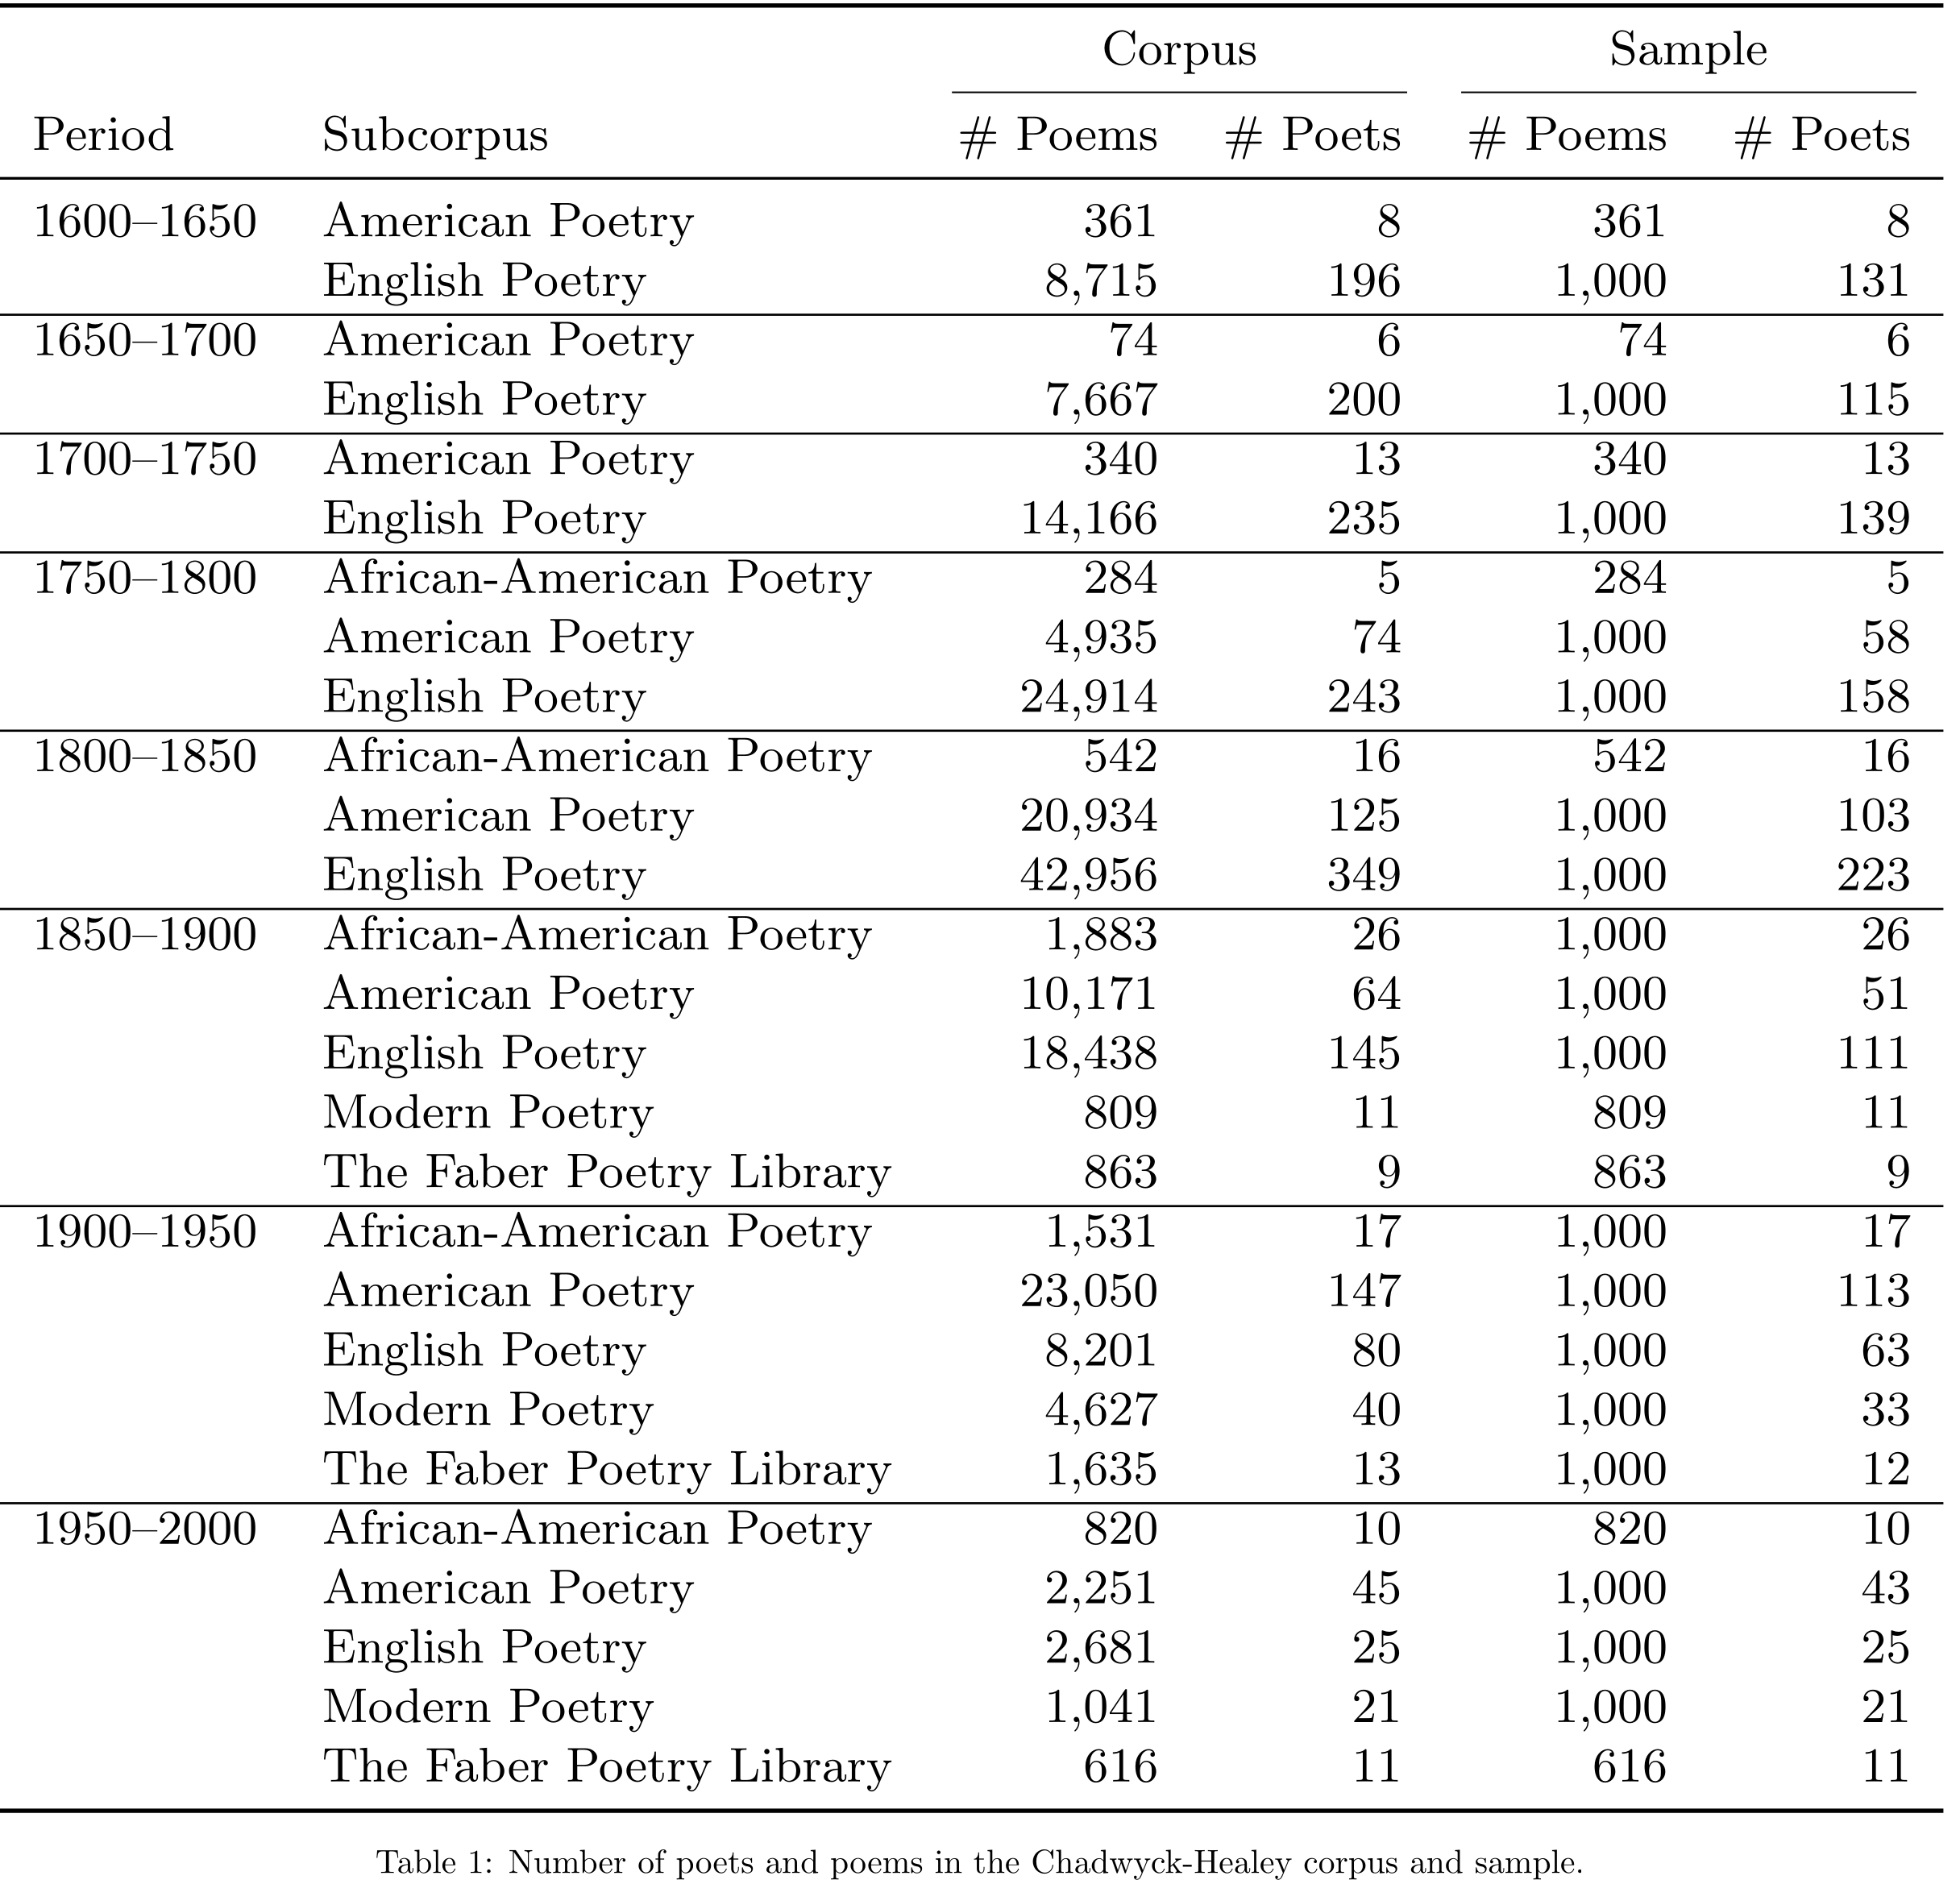

,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
english-ed2/ep2552/Z300670720,12,NaN,English Poetry,"Daley, Victor J. (Victor James), 1858-1905.",1858.0,The Pharisee,1888,32,Creeve Roe: Poetry by Victor Daley: Edited by ...,"He did not stand with open palm,",y,NaN,1850-1900,"He did not stand with open palm,\n Hand-fee..."
c20-english/car2302/Z200592139,14,1900-1999 Twentieth-Century,English Poetry,"Khalvati, Mimi, 1944-",1944.0,A Persian Miniature,1974,45,NaN,"She told us: take a picture, an art postcard",NaN,NaN,1900-1950,"She told us: take a picture, and art postcard\..."
english/keblejoh/Z200408216,22,1835-1869 Mid Nineteenth-Century,English Poetry,"Keble, John, 1792-1866",1792.0,Holy Communion.,1822,68,The Christian Year (1866),"How should pale sinners bear the sight,",y,NaN,1750-1800,"O God of Mercy, God of Might,\nHow should pale..."
english/devereau/Z400337559,30,1870-1899 Later Nineteenth-Century,English Poetry,"De Vere, Aubrey, 1814-1902",1814.0,XXI. SINE LABE ORIGINALI CONCEPTA.,1844,16,The Poetical Works (1884),"&indent;On Heaven, not him, are fixed her eyes:",y,NaN,1800-1850,Her foot is on the Lord of Night:\n On Heav...
american/am0240/Z300152753,39,1835-1869 Mid Nineteenth-Century,American Poetry,"Cary, Alice, 1820-1871",1820.0,TO A STAGNANT RIVER.,1850,24,The Poetical Works Of Alice and Phœbe Cary (1882),To the hill? Can you move him away from his pl...,y,NaN,1800-1850,"O river, why lie with your beautiful face\nTo ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
american/am0706/Z200170663,999520,1750-1799 Later Eighteenth-Century,American Poetry,"Odell, Jonathan, 1737-1818",1737.0,"TO A YOUNG LADY, ON THE DEATH OF HER FATHER",1767,36,The New Brunswick Poems (1982),"Almighty Ruler, whose unceasing Sway",y,NaN,1700-1750,"Almighty Ruler, whose unceasing Sway\nMillions..."
faber/fa1201/Z300559881,999649,1900-1999 Twentieth-Century,The Faber Poetry Library,"Hofmann, Michael, 1957-",1957.0,Fine Adjustments,1987,24,NaN,"By now, it is almost my father's arm,",NaN,NaN,1950-2000,"By now, it is almost my father's arm,\na man's..."
african-american/menardjo/Z200427784,999793,1870-1899 Later Nineteenth-Century,African-American Poetry,"Menard, John Willis, 1838-1893",1838.0,ACROSTIC.,1868,16,Lays in Summer Lands (1879),A modern type thou art of Egypt's queen:,y,Heroic couplets,1800-1850,"Majestic one! with regal from and mien,\nA mod..."


In [16]:
df_smpl_by_period_subcorpus_replicated = get_chadwyck_corpus_sampled_by_period_subcorpus_as_replicated(display=True, overwrite=False)
df_smpl_by_period_subcorpus_replicated

### By sonnet/period

In [17]:
df_smpl_by_sonnet_period_in_paper = get_chadwyck_corpus_sampled_by_sonnet_period_as_replicated()
df_smpl_by_sonnet_period_in_paper

* Generating sonnet sample
* Loading Chadwyck-Healey corpus (metadata + txt)
* Loading corpus metadata from memory
* Loading 204514 texts


  : 100%|██████████| 204514/204514 [00:06<00:00, 30349.00it/s]


* Sampling corpus by period (min 10, max 1000)
* Original sample size: 7606
* Final sample size: 3734

* Breakdown for period
1600-1650     152
1650-1700      65
1700-1750     325
1750-1800    1000
1800-1850    1000
1850-1900    1000
1900-1950     180
1950-2000      12

* Saved sample to /Users/rj416/github/generative-formalism/data/corpus_sample_by_sonnet_period.replicated.csv.gz


,id_hash,period_meta,subcorpus,author,author_dob,title,year,num_lines,volume,line,rhyme,genre,period,txt
id,,,,,,,,,,,,,,
american/am1120/Z200191044,252,1835-1869 Mid Nineteenth-Century,American Poetry,"Boker, George H. (George Henry), 1823-1890",1823.0,[CCLXV. The color of my lady's hair is brown],1853,14,Sonnets (1929),The color of my lady's hair is brown;,y,Sonnet,1800-1850,The colour of my lady's hair is brown;\nA high...
english/strongch/Z200499071,285,1800-1834 Early Nineteenth-Century,English Poetry,"Strong, Charles, 1785-1864",1785.0,XLII.,1815,14,Sonnets (1862),"Sees a loved comrade fall, yet onward goes",y,Sonnet,1750-1800,"As One, who in the battle's hight career\nSees..."
c20-english/car2902/Z300134412,442,1900-1999 Twentieth-Century,Modern Poetry,"Morgan, Edwin, 1920-",1920.0,The Norn (1) (1990),1950,14,,"It was high summer, and the sun was hot.",,Sonnet,1900-1950,"It was high summer, and the sun was hight.\nWe..."
english/rawnsley/Z200472657,451,1870-1899 Later Nineteenth-Century,English Poetry,"Rawnsley, H. D. (Hardwicke Drummond), 1851-1920",1851.0,IV. SPIRE OF SAINT MARY REDCLIFFE.,1881,14,Sonnets Round the Coast (1887),The vessels write their runes upon the sky;,y,Sonnet,1850-1900,"By spar and shroud, with their untutored hands..."
english/langandr/Z400413312,606,1870-1899 Later Nineteenth-Century,English Poetry,"Lang, Andrew, 1844-1912",1844.0,A Sonnet to Heavenly Beauty Du Bellay,1874,14,The Poetical Works (1923),In the Eternal—if the years in vain,y,Sonnet,1800-1850,If this our little life is but a day\nIn the E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
english/sewardan/Z300482283,990876,1750-1799 Later Eighteenth-Century,English Poetry,"Seward, Anna, 1742-1809",1742.0,SONNET LXXX.,1772,14,The Poetical Works (1810),&indent;When juvenescent April's showery sun,y,Sonnet,1700-1750,As lightens the brown hill to vivid green\n ...
english/griffinb/Z200383290,994660,1500-1580 Tudor,English Poetry,"Griffin, Bartholomew, d. 1602",1602.0,"SONNET. VIII. [Griefe vrging guest, great cau...",1632,14,"Fidessa, more chaste then kinde (1596)",&indent;Yet hope perswading hope expecteth grace:,y,Sonnet,1600-1650,"Grief urging guest, great cause have I to plai..."
english/edwards2/Z200344700,997188,1700-1749 Early Eighteenth-Century,English Poetry,"Edwards, Thomas, 1699-1757",1699.0,SONNET XXXVII. On the Death of Miss J. M.,1729,14,Sonnets (1758),&indent;And good be huddled in untimely grave?,y,Sonnet,1650-1700,"Young, fair, and good! ah why should young and..."
